### Name-eda

### 1.Introduction

### 2.Fetching the Data

In [7]:
# import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
# warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [8]:
#import data
data = pd.read_csv("data/adult.csv")

In [9]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [10]:
data.shape

(48842, 15)

In [11]:
data_num = data.copy()

### 3.Data Cleaning

In [13]:
# Fixing common null values

attrib,counts = np.unique(data["workclass"], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data["workclass"][data["workclass"] == "?" ] = most_freq_attrib

attrib, counts = np.unique(data["occupation"], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data["occupation"][data["occupation"] == "?"] = most_freq_attrib

attrib, counts = np.unique(data["native-country"],return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)] 
data["native-country"][data["native-country"] == "?"] = most_freq_attrib

C:\Users\Caíque Miranda\AppData\Local\Temp\ipykernel_3172\3729204255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["workclass"][data["workclass"] == "?" ] = most_freq_attrib
C:\Users\Caíque Miranda\AppData\Local\Temp\ipykernel_3172\3729204255.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["occupation"][data["occupation"] == "?"] = most_freq_attrib
C:\Users\Caíque Miranda\AppData\Local\Temp\ipykernel_3172\3729204255.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [14]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


definir as variaves income

In [15]:
data['income'] = data['income'].map({'<=50K': 0,'>50K': 1, '<=50k.': 0, '>50K.':1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


### 4. Summary

In [16]:
# 4.1 Summary statistics for numeric attributes
data_num = data_num.drop(["educational-num", "income"], axis = 1)
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [17]:
# Summary of attributes explain following things

For "Age":
1. The mean value is 38 i.e on an average the value of age attribute is 38.
2. Age is having std devation of 13.71 which indicated the deviation of an observation from the mean.
3. The value of Age attribute varies from 17 to 90.
4. The 1st quartile is 28 i.e. 25% of the observation lies below 28.
5. 3rd quartile of 48 which indicates 75% of the observations the values of age is less than 48.
6. The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which indicated thatthe data is more dispersed after the value 48.
7. The difference between mean and median is not significantly high but the difference between 3rd quartile and maximum made the distributionright skewed.

For "fnlwgt":
1. This the sampling weight corresponding to the observation
2. Final weight seems to be rightly skewed since there is very large distance between median and maximum value as compared to minimum &median value.

For "capital-gain":
1. For capital gain , the mean is 1079.06 and median is 0, which indicated that the distribution is highly right skewed.
2. From the quartiles it clearly visible that 75% observation are having capital gain zero.
3. Capital-gain is more concentrated on one particular value i.e zero and other are spread after 3rd quartile which results as the large std devation7452.01.
4. It shows that either a person has no gain or has gain a very large amount (10k to 99k).

For "capital-loss":
1. This attribute is similar to the capatial-gain i.e. most of the centred values are 0. As minimum is 0 and value lies under 75 percentile is also zero.
2. Mean is 87 but meadian is 0. i.e. mean is greater than median that means it is right skewed distrubution

For "hours-per-week"
1. This attribute means number of working hours spend by an individual in a week.
2. This attribute varies within the range of 1 to 99.
3. 75% of the people spend 45 or less working hours per week.
4. The IQR is very less i.e.[40-45] which indicated that 50% of the observation are concentrated between 40 to 45.
5. Observation are very sparse below 25th percentile and after 75th percentile.
6. Using quartiles we can say that data is symmetric
7. Minimum is 1 hr per week and max is 99 hr per week. means person spending 99 working hours per week are very rare events.

In [18]:
# 4.2 summmary and count for categorical attribute

In [19]:
data.describe(include = ["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


1. native-country has more number of unique catgories i.e. 41 categories.
2. But the native-country is highly biased towards the US which has frequency of 44689 out of total 48842 (nearly 91%)
3. Occupation has more or less uniform distribution of categories as compared to the other attributes.
4. Race is also biased to the white race categories(41762) with 85.5%.
5. The top category in workclass is private having frequecy of (36705) and percentage (75.5%).

### 5. EDA

#### 5.1 Univariate Analysis

##### 5.1.1 Age

i. Distubution

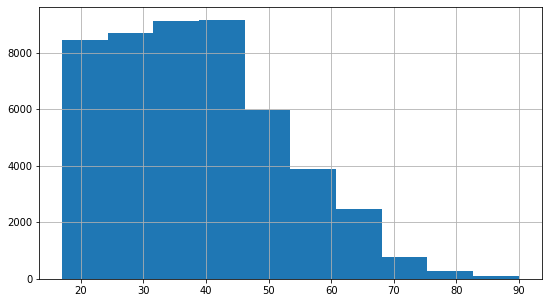

In [20]:
data["age"].hist(figsize = (9, 5))
plt.show()

In [21]:
data[data["age"] > 70].shape

(868, 15)

ii. Desription about the distribution :

The above histogram shows that :

- "age" atrribute is not symmetric .
- it is right skewed(But is ok,as younger adult wages more than the older ones)
- minimum and maximum age of the people is 17 and 90 respectively
- this dataset have fewer observations (868) of people's age after certain age i.e 70

##### 5.1.2 Hours-per-week

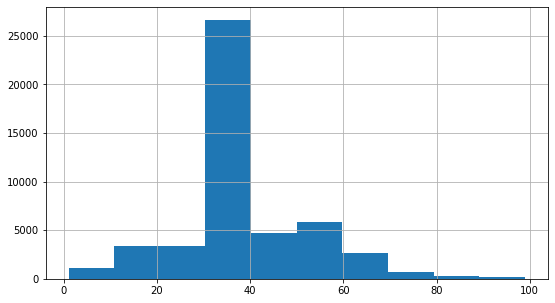

In [22]:
data["hours-per-week"].hist(figsize = (9, 5))
plt.show()

ii. Desription about the distribution :

The above histogram of "Hours-per-week" shows that :
- this data varies within the range of 1 to 99.
- most people work 30 to 40 hours per week, they are roughly 27000 people
- There are some people who works 80-100 hrs per week and some less than 20 which is unusual
- 75% of the people spend 45 or less working hour-per-week.

##### 5.1.3 fnlwgt

i. Distrubution

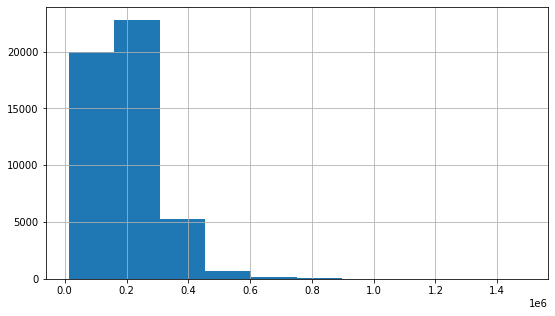

In [23]:
data["fnlwgt"].hist(figsize = (9, 5))
plt.show()

ii. Desription about the distribution :

The above histogram shows that :
- This is the sampling weight corresponding to the observation
- the distribution of final weight seems to be right skewed since mean(189664.1) is greater than median(178144.5)

##### 5.1.4 capital-pain

i. Distribution

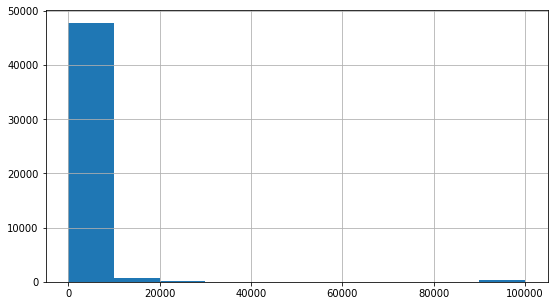

In [24]:
data["capital-gain"].hist(figsize = (9, 5))
plt.show()

ii. Desription about the distribution :

The above histogram shows that :
- the most capital-gain values are centered on 0 and few on 10k and 99k
- Capital-gain is more concentrated on one particular valueand spread with large std devation 7452.01.
- It shows that either a person has no gain or has gain a very large amount (10k to 99k).

##### 5.1.5 capital-loss

i. Distribution

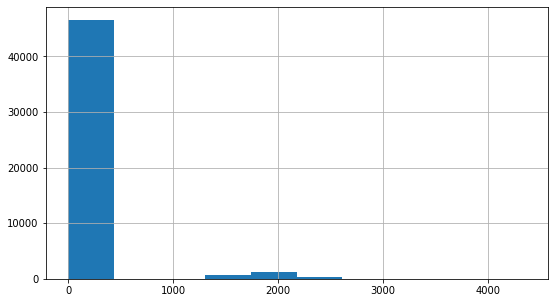

In [25]:
data["capital-loss"].hist(figsize = (9, 5))
plt.show()

In [26]:
data[data["capital-loss"] > 0].shape

(2282, 15)

ii. Desription about the distribution :

The above histogram shows that :
- it shows that most of the capital-loss values are centered on 0 and only few are non-zero(2282).
- this attribute is simi;ar to the capital-gain i.e ,ost of the values are centred on 0 nearly(43000 of them)

##### Relationship between capital - gain and capital loss

c:\Users\Caíque Miranda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


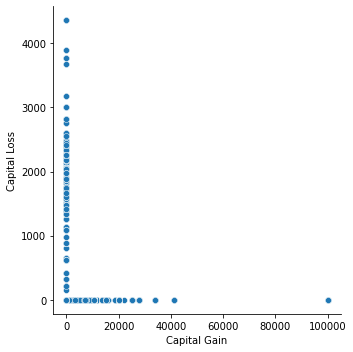

In [27]:
sns.relplot("capital-gain", "capital-loss",
            data = data)

plt.xlabel("Capital Gain")
plt.ylabel("Capital Loss")
plt.show()

- both capital gain and capital loss can be zero.
- if capital gain is zero there is possibility of capital loss being high or above zero.
- if capital loss is zero there is possibility of capital gain being heigh or ove zero.

##### 5.1.6 workclass

i. Distribution

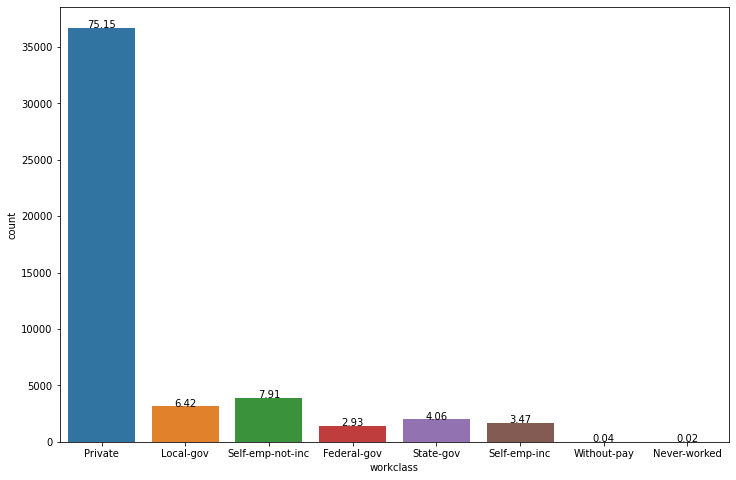

In [28]:
plt.figure(figsize = (12, 8))
total = float(len(data["income"]))
ax = sns.countplot(x = "workclass",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

Summary distribution shows that:
    
- There are 8 unique categories present in the worclass attribute.
- Most of them belong to the private workclass(36705) i.e. 75.15%.
- without-pay and never-worked has minimum count in workclass attribute(less than 1%).
- There is huge imbalance in the categories of workclass attribute.

##### 5.1.7 Education

i.Distribution

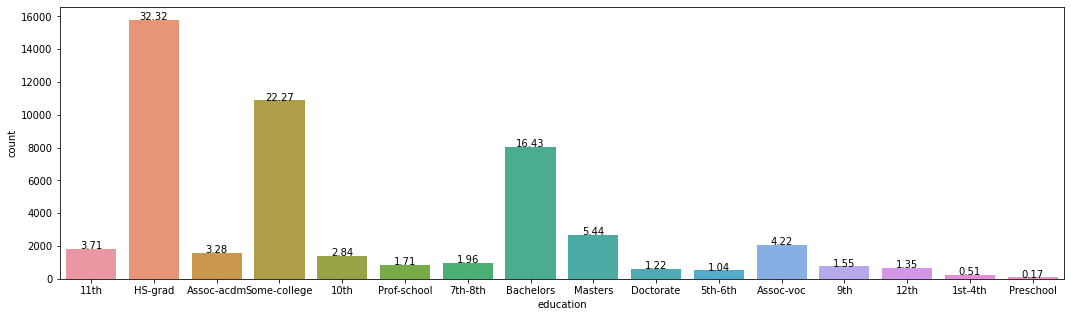

In [29]:
plt.figure(figsize = (18, 5))
total = float(len(data["income"]))
ax = sns.countplot(x = "education",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

- There are 16 unique categories present in the education attribute.
- Hs-grad has 32.32% of all the education attribute.
- HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
- Pre-school has minimum samples i.e. 83.

##### 5.1.8 marital-status

i. Distributio

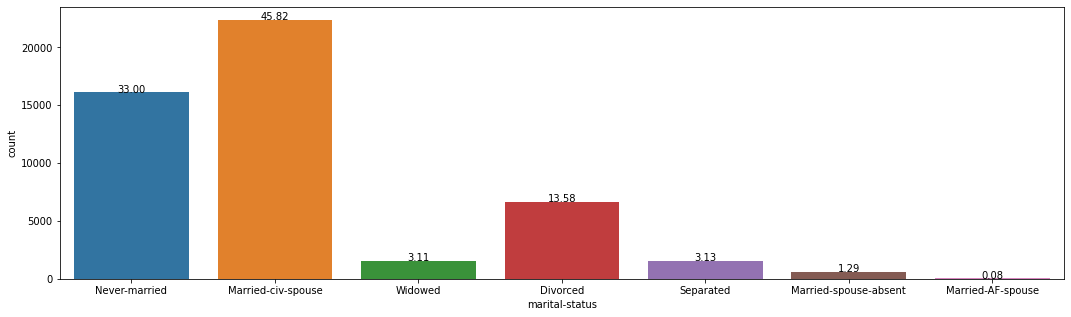

In [30]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "marital-status",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

- This marital-status attribute has 7 unique categories.
- Two of them are dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
- Married-civ-spouse has maximum number of samples.
- Married-AF-spouse has minimum number of obs.

##### 5.1.9 Occupation

i. Distribution

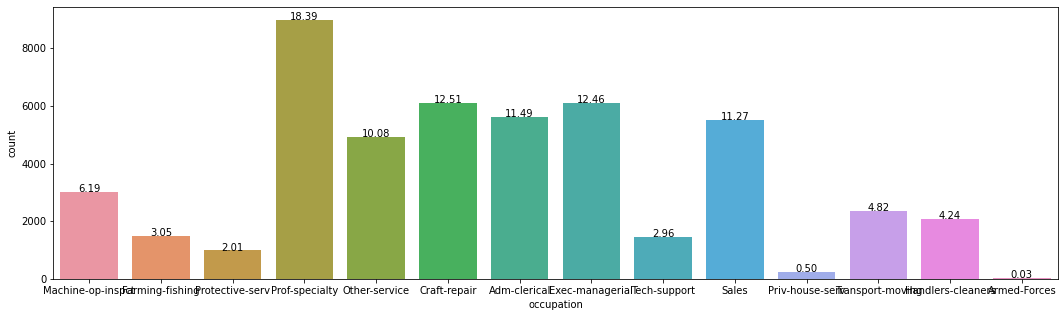

In [31]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "occupation",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

- There are 14 unique categories present in the occupation attribute.
- Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial
and Adm-clerical Sales has comparable number ofobservations.
- Armed-Forces * has minimum samples in the occupation* attribute

##### 5.1.10 Relationship

i. Distribution

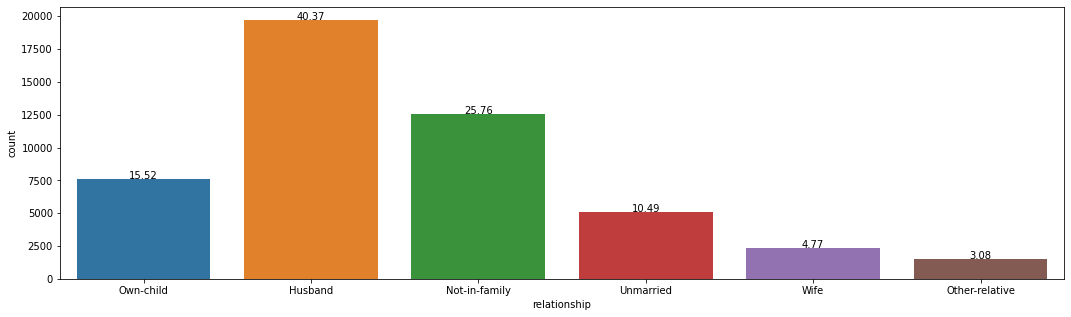

In [32]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "relationship",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

- There are 6 unique categories in the relationship attribute.
- Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

##### 5.1.11 Race

i. Distribution

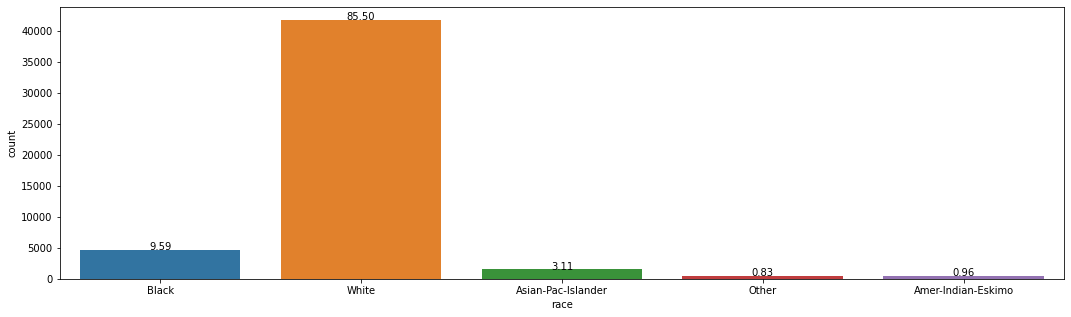

In [33]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "race",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

- This distribution explains that:
- There are 5 unique categories in the race attribute.
- Most of them are "white" which is roughly 85.50%.
- This dataset is totally bias toward the "white" race.
- Second major race in the dataset is the "black" with just 9.59%

##### 5.1.12 Gender

i. Distribution

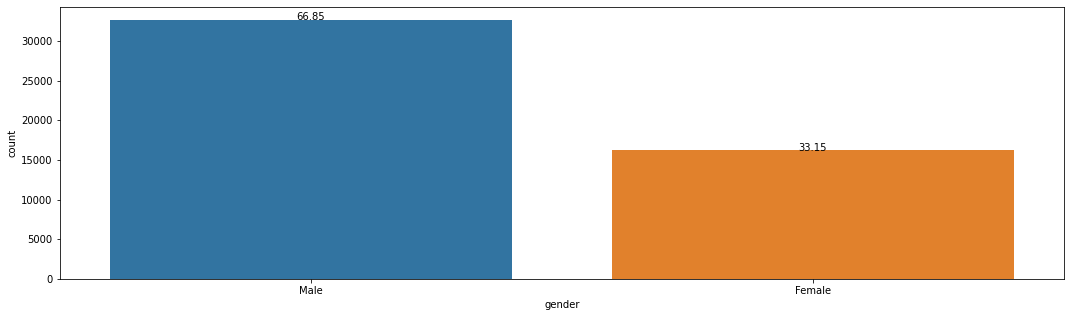

In [34]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "gender",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

ii. Description about distribution

- This distribution explains that:
- Gender has 2 unique categories(male and female).
- But the frequency of male(32650) is higher than the female(16192) categories.
- Distribution shows that this dataset is skewed toward the male with nearly 67%.

##### 5.1.13 Gender

i. Distribution

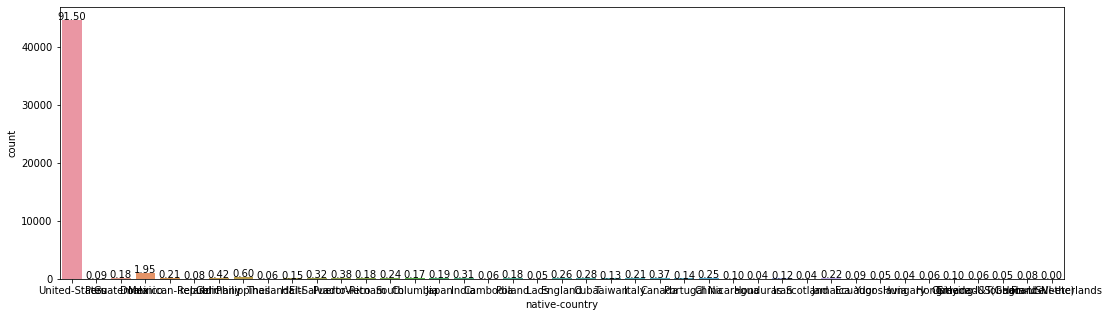

In [35]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "native-country",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

- This dataset is taken from the US.
- As 91.5% of them have native country America and others are immigrants.

##### 5.1.14 Income(Target variable)

i. Distribution

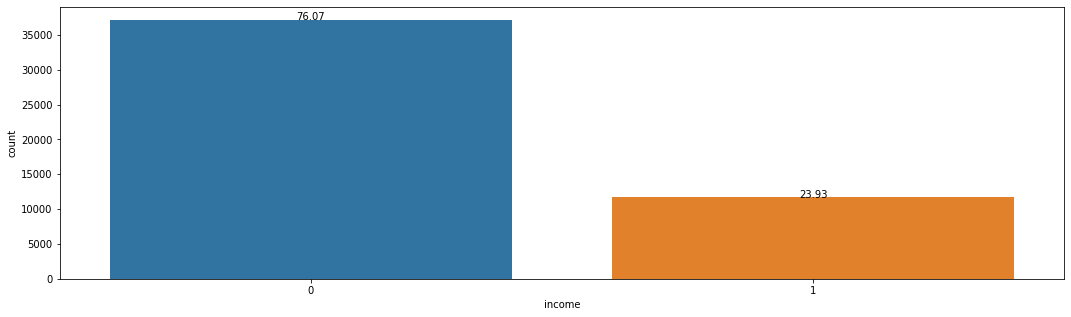

In [37]:
plt.figure(figsize=(18, 5))
total = float(len(data))
ax = sns.countplot(x = "income",
                   data = data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            "{:1.2f}".format((height / total) * 100),
            ha = "center")
    
plt.show()

This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income
group 0 (whoearnslessthan50k).

#### 5.2.Bivariate analysis

##### 5.2.1 Age

i. Boxplot (Relationship with income)

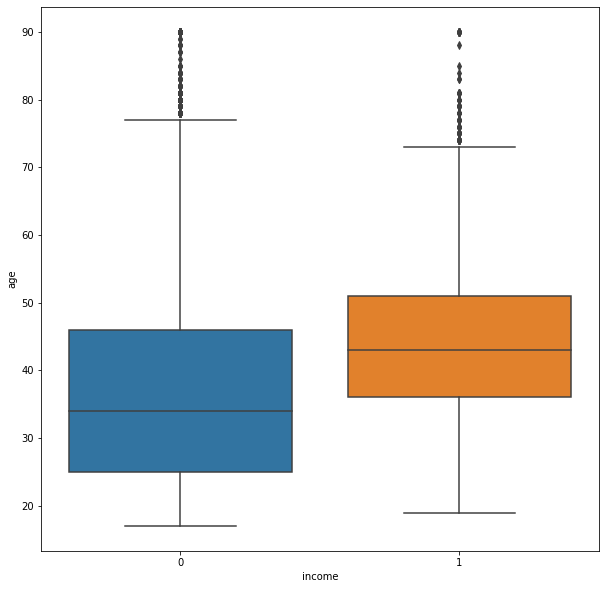

In [38]:
gig= plt.figure(figsize = (10,
                           10))
sns.boxplot(x = "income",
            y = "age",
            data = data)
plt.show()

In [39]:
data[['income','age']].groupby(['income'],
as_index = False).mean().sort_values(by = 'age',
                                     ascending = False)

,income,age
1,1,44.275178
0,0,36.872184


The mean "age" for Income group(<=50k) is 36.8 years.
And for Income group(>50k) is 44.2 years

### End.